## 数据准备

In [1]:
#导入库
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#显示中文
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
#忽略报错
import warnings
warnings.filterwarnings('ignore')

In [3]:
pdd=pd.read_csv(r'/Users/apple/Desktop/商业数据分析项目/week 7/拼多多优惠券数据.csv')

In [4]:
pdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          25317 non-null  int64 
 1   age                         25317 non-null  int64 
 2   job                         25317 non-null  object
 3   marital                     25317 non-null  object
 4   default                     25317 non-null  object
 5   returned                    25317 non-null  object
 6   loan                        25317 non-null  object
 7   coupon_used_in_last6_month  25317 non-null  int64 
 8   coupon_used_in_last_month   25317 non-null  int64 
 9   coupon_ind                  25317 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [5]:
pdd.describe()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,2.772050,0.292847,0.116957
std,7308.532719,10.634289,3.136097,0.765498,0.321375
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,6330.000000,33.000000,1.000000,0.000000,0.000000
50%,12659.000000,39.000000,2.000000,0.000000,0.000000
75%,18988.000000,48.000000,3.000000,0.000000,0.000000
max,25317.000000,95.000000,55.000000,15.000000,1.000000


- age中可能存在异常值（max95）
- coupon_used_in_last6_month分布较为离散，max过大55，可以考虑分箱

In [6]:
pdd.head()

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
0,1,43,management,married,no,yes,no,2,0,0
1,2,42,technician,divorced,no,yes,no,1,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0
3,4,28,management,single,no,yes,yes,2,0,0
4,5,42,technician,divorced,no,yes,no,5,0,0


In [7]:
sum(pdd.duplicated())

0

In [8]:
pdd.ID.nunique()

25317

In [9]:
pdd.drop('ID',axis=1,inplace=True)

In [10]:
pdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         25317 non-null  int64 
 1   job                         25317 non-null  object
 2   marital                     25317 non-null  object
 3   default                     25317 non-null  object
 4   returned                    25317 non-null  object
 5   loan                        25317 non-null  object
 6   coupon_used_in_last6_month  25317 non-null  int64 
 7   coupon_used_in_last_month   25317 non-null  int64 
 8   coupon_ind                  25317 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.7+ MB


## EDA

### 目标列

In [11]:
#目标列重命名为flag
pdd=pdd.rename(columns={'coupon_ind':'flag'})

In [12]:
pdd.flag.value_counts(1)

0    0.883043
1    0.116957
Name: flag, dtype: float64

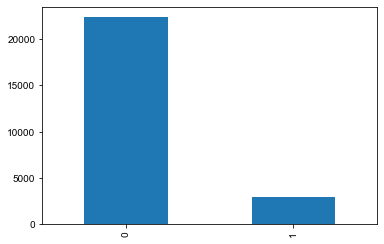

In [13]:
pdd.flag.value_counts().plot(kind='bar');

- 数据不均衡，未使用优惠券的样本占到了88.3%

### age

In [14]:
pdd.age.describe()

count    25317.000000
mean        40.935379
std         10.634289
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

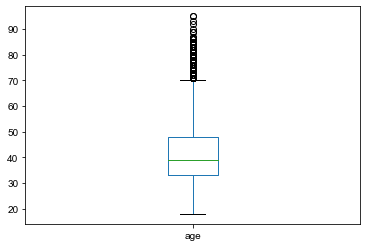

In [15]:
pdd.age.plot(kind='box');

- age可能存在离群值

In [16]:
#age与目标列flag关系
pdd.groupby('flag')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
flag,,,,,,,,
0,22356.0,40.819601,10.17824,18.0,33.0,39.0,48.0,95.0
1,2961.0,41.809524,13.56260,18.0,32.0,38.0,51.0,95.0


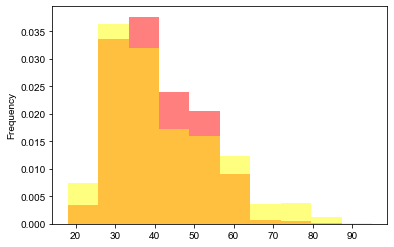

In [17]:
#不使用优惠券（红色）
pdd[pdd['flag']==0]['age'].plot(kind='hist',density=True,color='red',alpha=0.5)
#使用优惠券（黄色）
pdd[pdd['flag']==1]['age'].plot(kind='hist',density=True,color='yellow',alpha=0.5)

- age<35 & >55偏好使用优惠券，35-55不怎么使用优惠券。
- age分箱可考虑<35,<55,<95或剔除离群值。

###  job

In [18]:
pdd.job.value_counts(1)

blue-collar      0.215507
management       0.209188
technician       0.167516
admin.           0.114903
services         0.092507
retired          0.050282
self-employed    0.034917
entrepreneur     0.033811
unemployed       0.027689
housemaid        0.026188
student          0.021053
unknown          0.006438
Name: job, dtype: float64

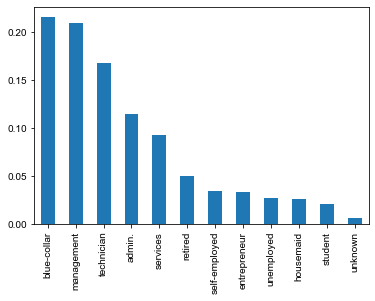

In [19]:
pdd.job.value_counts(1).plot(kind='bar')

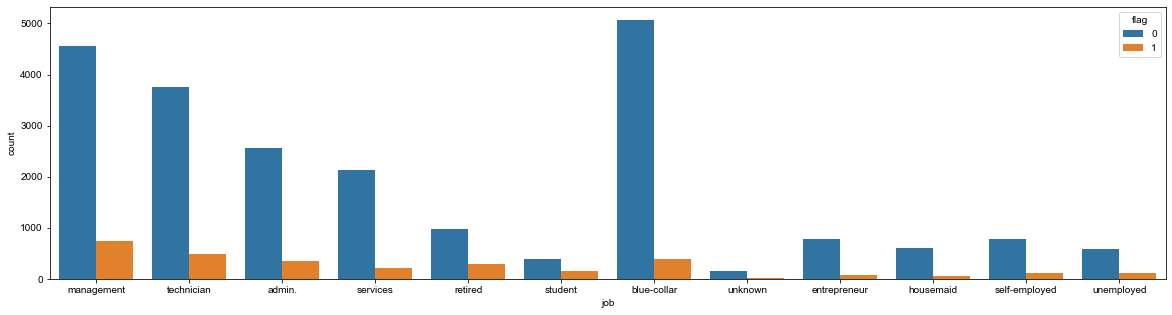

In [20]:
#job与flag关系
plt.figure(figsize=(20,5))
sns.countplot(x='job',hue='flag',data=pdd)

- 因为本身数据中蓝领数量就偏多，所以此处不应该看数量count，应该看比例。

In [21]:
tmp = pd.DataFrame(pdd.groupby('job')['flag'].value_counts(1))

In [22]:
tmp = tmp.rename(columns={'flag':'rate'}).reset_index()
tmp

,job,flag,rate
0,admin.,0,0.882778
1,admin.,1,0.117222
2,blue-collar,0,0.929069
3,blue-collar,1,0.070931
4,entrepreneur,0,0.921729
5,entrepreneur,1,0.078271
6,housemaid,0,0.912519
7,housemaid,1,0.087481
8,management,0,0.861027
9,management,1,0.138973


In [23]:
#使用优惠券rate排序
tmp_order = tmp[tmp.flag==1].sort_values(by='rate').job.tolist()

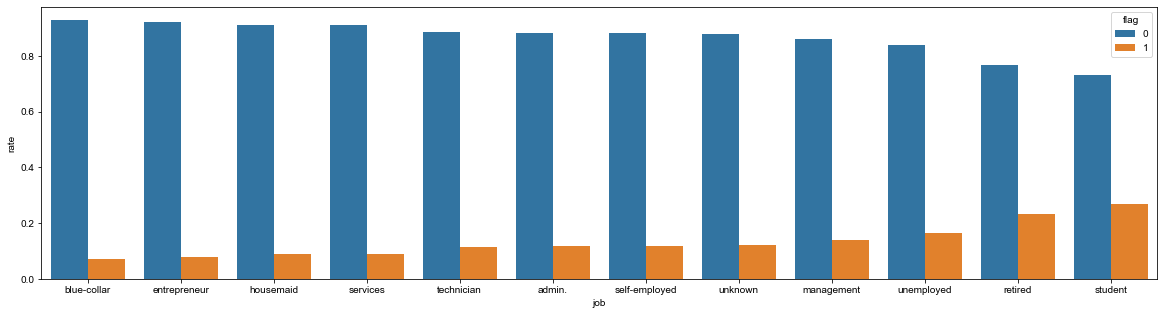

In [24]:
plt.figure(figsize=(20,5))
sns.barplot(x='job',y='rate',hue='flag',order=tmp_order,data=tmp);

- retired,student,unemployed 更偏好使用优惠券
- 可以尝试类别合并

### marital

In [25]:
pdd.marital.value_counts(1)

married     0.602165
single      0.282695
divorced    0.115140
Name: marital, dtype: float64

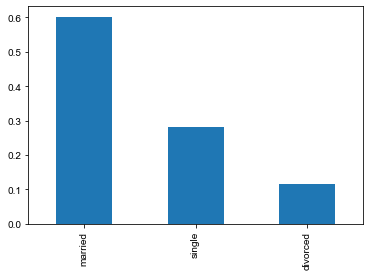

In [26]:
pdd.marital.value_counts(1).plot(kind='bar');

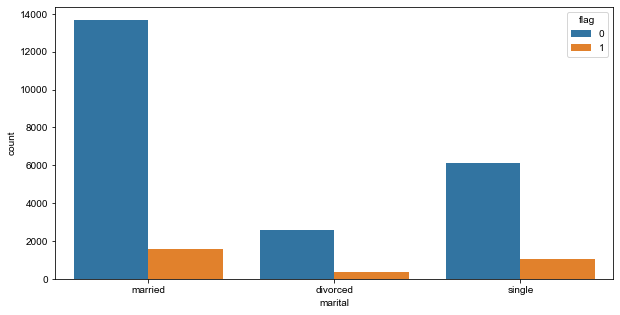

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='marital',hue='flag',data=pdd);

In [28]:
tmp = pd.DataFrame(pdd.groupby('marital')['flag'].value_counts(1))
tmp = tmp.rename(columns={'flag':'rate'})
tmp = tmp.reset_index()
tmp

,marital,flag,rate
0,divorced,0,0.880617
1,divorced,1,0.119383
2,married,0,0.897343
3,married,1,0.102657
4,single,0,0.853570
5,single,1,0.146430


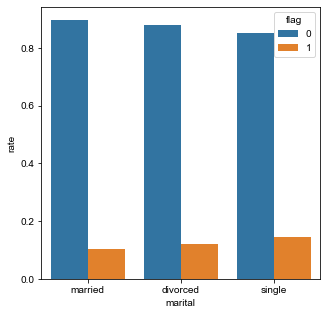

In [29]:
tmp_order = tmp[tmp.flag==1].sort_values(by='rate').marital.tolist()
plt.figure(figsize=(5,5))
sns.barplot(x='marital',y='rate',hue='flag',order=tmp_order,data=tmp);

- single更偏好使用优惠券

### default

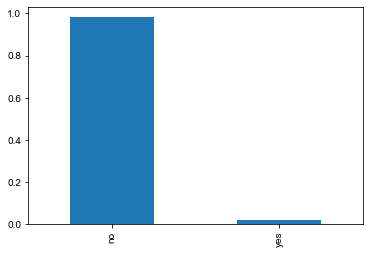

In [30]:
pdd.default.value_counts(1)
pdd.default.value_counts(1).plot(kind='bar');

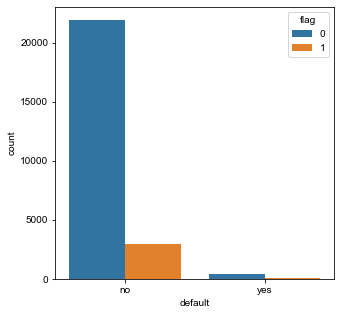

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(x='default',hue='flag',data=pdd);

In [32]:
tmp = pd.DataFrame(pdd.groupby('default')['flag'].value_counts(1))
tmp = tmp.rename(columns={'flag':'rate'})
tmp = tmp.reset_index()
tmp

,default,flag,rate
0,no,0,0.881982
1,no,1,0.118018
2,yes,0,0.941964
3,yes,1,0.058036


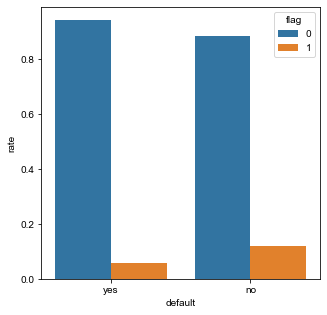

In [33]:
tmp_order = tmp[tmp.flag==1].sort_values(by='rate').default.tolist()
plt.figure(figsize=(5,5))
sns.barplot(x='default',y='rate',hue='flag',order=tmp_order,data=tmp);

- 没有违约过的人更偏好使用优惠券

### returned

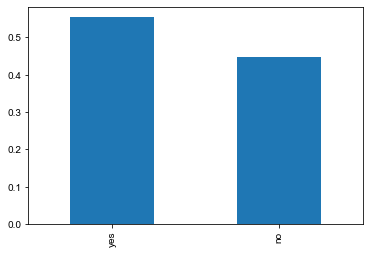

In [34]:
pdd.returned.value_counts(1)
pdd.returned.value_counts(1).plot(kind='bar');

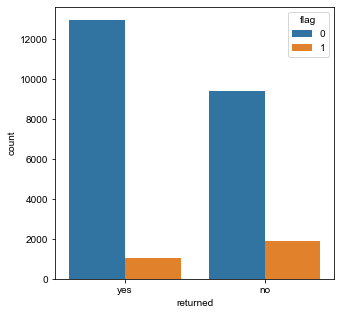

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(x='returned',hue='flag',data=pdd);

In [36]:
tmp = pd.DataFrame(pdd.groupby('returned')['flag'].value_counts(1))
tmp = tmp.rename(columns={'flag':'rate'})
tmp = tmp.reset_index()
tmp

,returned,flag,rate
0,no,0,0.831637
1,no,1,0.168363
2,yes,0,0.924465
3,yes,1,0.075535


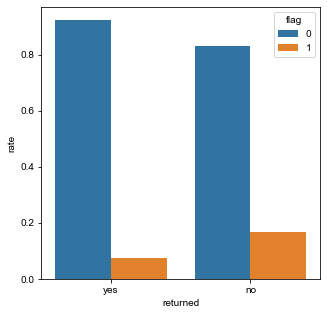

In [37]:
tmp_order = tmp[tmp.flag==1].sort_values(by='rate').returned.tolist()
plt.figure(figsize=(5,5))
sns.barplot(x='returned',y='rate',hue='flag',order=tmp_order,data=tmp);

- 没有退过货的人更偏好使用优惠券

### loan  

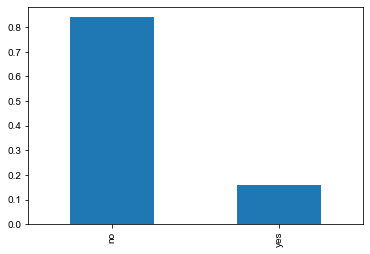

In [38]:
pdd.loan.value_counts(1)
pdd.loan.value_counts(1).plot(kind='bar');

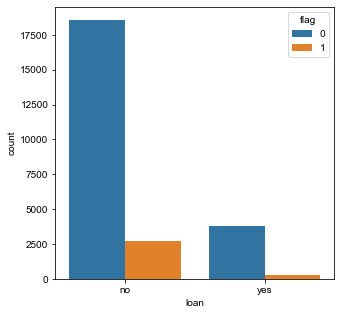

In [39]:
plt.figure(figsize=(5,5))
sns.countplot(x='loan',hue='flag',data=pdd);

In [40]:
tmp = pd.DataFrame(pdd.groupby('loan')['flag'].value_counts(1))
tmp = tmp.rename(columns={'flag':'rate'})
tmp = tmp.reset_index()
tmp

,loan,flag,rate
0,no,0,0.873883
1,no,1,0.126117
2,yes,0,0.931017
3,yes,1,0.068983


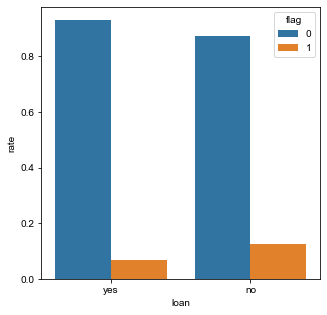

In [41]:
tmp_order = tmp[tmp.flag==1].sort_values(by='rate').loan.tolist()
plt.figure(figsize=(5,5))
sns.barplot(x='loan',y='rate',hue='flag',order=tmp_order,data=tmp);

- 没有loan的用户更偏好使用优惠券

### coupon_used_in_last6_month

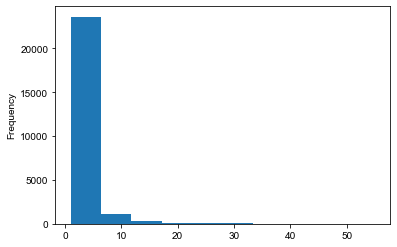

In [42]:
pdd.coupon_used_in_last6_month.plot(kind='hist');

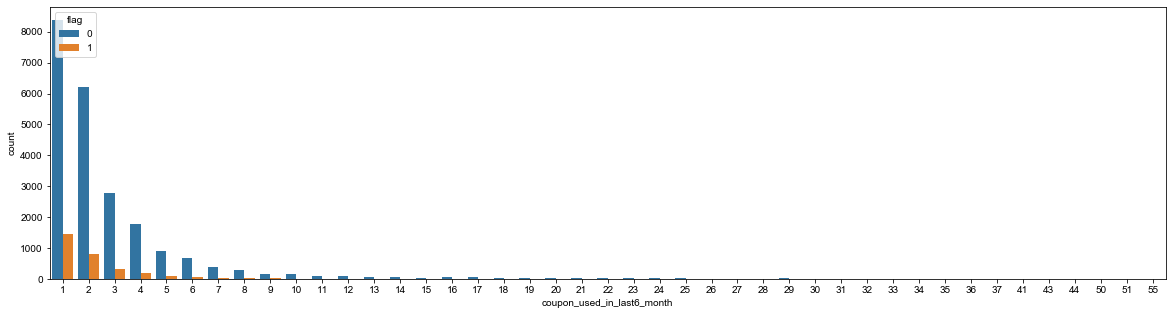

In [43]:
pdd.coupon_used_in_last6_month.value_counts(1)
plt.figure(figsize=(20,5))
sns.countplot(x='coupon_used_in_last6_month',hue='flag',data=pdd);

In [44]:
tmp = pd.DataFrame(pdd.groupby('coupon_used_in_last6_month')['flag'].value_counts(1))
tmp = tmp.rename(columns={'flag':'rate'})
tmp = tmp.reset_index()
tmp

,coupon_used_in_last6_month,flag,rate
0,1,0,0.853232
1,1,1,0.146768
2,2,0,0.886289
3,2,1,0.113711
4,3,0,0.894448
...,...,...,...
58,43,0,1.000000
59,44,0,1.000000
60,50,0,1.000000
61,51,0,1.000000


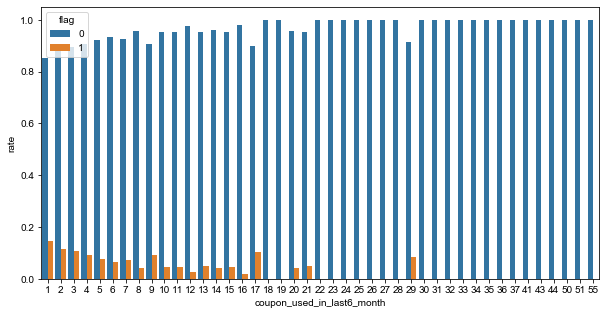

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x='coupon_used_in_last6_month',y='rate',hue='flag',data=tmp);

- 近6个月使用优惠券<10的用户更偏好使用优惠券
- 可以考虑分箱处理

### coupon_used_in_last_month

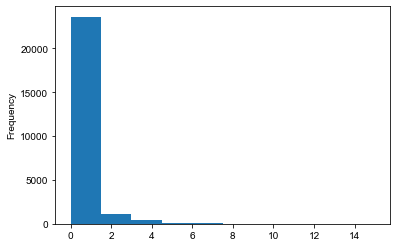

In [46]:
pdd.coupon_used_in_last_month.plot(kind='hist');

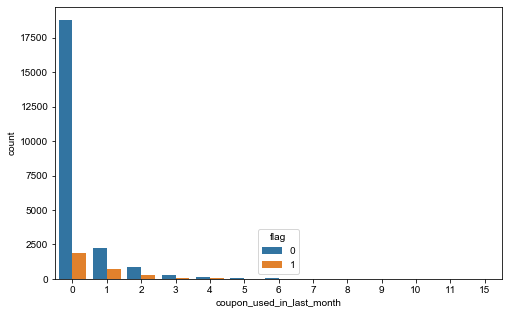

In [47]:
pdd.coupon_used_in_last_month.value_counts(1)
plt.figure(figsize=(8,5))
sns.countplot(x='coupon_used_in_last_month',hue='flag',data=pdd);

In [48]:
tmp = pd.DataFrame(pdd.groupby('coupon_used_in_last_month')['flag'].value_counts(1))
tmp = tmp.rename(columns={'flag':'rate'})
tmp = tmp.reset_index()
tmp

,coupon_used_in_last_month,flag,rate
0,0,0,0.909113
1,0,1,0.090887
2,1,0,0.754326
3,1,1,0.245674
4,2,0,0.769368
5,2,1,0.230632
6,3,0,0.796721
7,3,1,0.203279
8,4,0,0.814815
9,4,1,0.185185


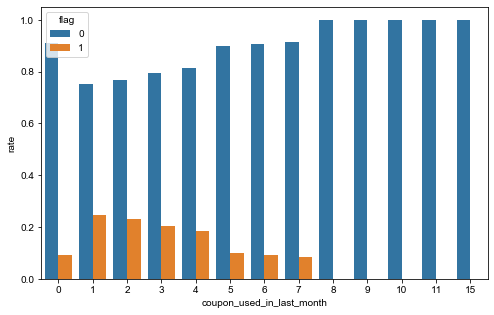

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x='coupon_used_in_last_month',y='rate',hue='flag',data=tmp);

- 近1个月使用优惠券1-7的用户偏好使用优惠券，近1个月使用优惠券0的用户偏好使用优惠券的比例不是很高（可能因为该批用户没有使用优惠券的习惯）
- 可以考虑分箱处理

## 特征处理

In [50]:
pdd_clean=pdd.copy()

In [51]:
#哑变量处理
pdd_clean=pd.get_dummies(pdd_clean,drop_first=True)

In [52]:
pdd_clean.head()

,age,coupon_used_in_last6_month,coupon_used_in_last_month,flag,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,default_yes,returned_yes,loan_yes
0,43,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,42,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,47,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,28,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
4,42,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [53]:
#查看各变量与目标列flag关系
pdd_clean.corr()[['flag']].sort_values('flag',ascending=False)

,flag
flag,1.000000
coupon_used_in_last_month,0.116550
job_retired,0.083868
job_student,0.069058
marital_single,0.057574
job_management,0.035234
age,0.029916
job_unemployed,0.023980
job_unknown,0.001438
job_self-employed,0.001078


## 建模

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

In [55]:
#设置x，y
x = pdd_clean.drop('flag',axis=1)
y = pdd_clean.flag

#分割数据集，增加stratify=y依照y比例拆分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y)

#训练数据
LR=LogisticRegression(random_state=100)
LR.fit(x_train,y_train)

y_pred_test=LR.predict(x_test)

#测试集模型评估
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6708
           1       0.42      0.01      0.01       888

    accuracy                           0.88      7596
   macro avg       0.65      0.50      0.47      7596
weighted avg       0.83      0.88      0.83      7596



In [56]:
#confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[6701,    7],
       [ 883,    5]])

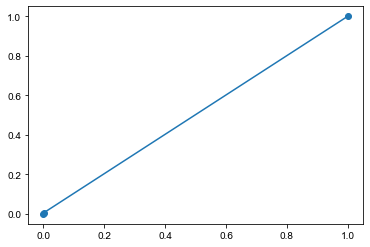

AUC=0.5023


In [57]:
#roc/auc评估
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_test,pos_label=1)
plt.plot(fpr,tpr,marker='o')
plt.show()
print('AUC=%.4f'%metrics.auc(fpr,tpr))

## 优化

### 增加class_weight='balanced'

In [58]:
#增加class_weight='balanced'
LR_balanced=LogisticRegression(random_state=100,class_weight='balanced')
LR_balanced.fit(x_train,y_train)
y_pred_balanced=LR_balanced.predict(x_test)
#测试集模型评估
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_balanced))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      6708
           1       0.20      0.66      0.30       888

    accuracy                           0.64      7596
   macro avg       0.57      0.65      0.53      7596
weighted avg       0.85      0.64      0.71      7596



In [59]:
#confusion_matrix
confusion_matrix(y_test,y_pred_balanced)

array([[4294, 2414],
       [ 301,  587]])

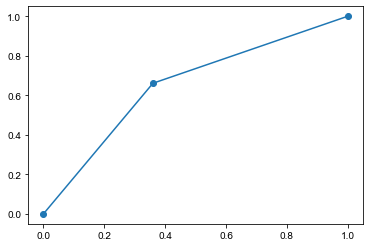

AUC=0.6506


In [60]:
#roc/auc评估
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_balanced,pos_label=1)
plt.plot(fpr,tpr,marker='o')
plt.show()
print('AUC=%.4f'%metrics.auc(fpr,tpr))

### NearMiss下采样

              precision    recall  f1-score   support

      flag=0       0.81      0.88      0.84       906
      flag=1       0.86      0.79      0.82       871

    accuracy                           0.83      1777
   macro avg       0.84      0.83      0.83      1777
weighted avg       0.84      0.83      0.83      1777



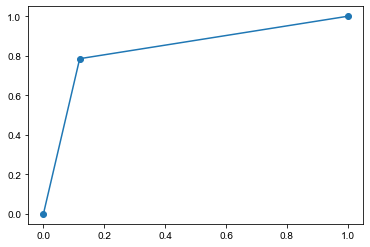

AUC=0.8330


In [61]:
x = pdd_clean.drop('flag',axis=1)
y = pdd_clean.flag

# NearMiss算法
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=2) #选取正例样本中与N个最远邻负样本平均距离最短的样本
x_nm1, y_nm1 = nm1.fit_sample(x, y)

# 分割数据集
x_train, x_test, y_train, y_test = train_test_split(x_nm1, y_nm1, test_size = 0.3, random_state = 100)

# 训练模型
LR = LogisticRegression(class_weight='balanced')
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['flag=0', 'flag=1']))

# ROC/AUC评估
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr, marker='o')
plt.show()
print("AUC=%.4f"%metrics.auc(fpr, tpr))

#### 改变自变量

              precision    recall  f1-score   support

      flag=0       0.94      1.00      0.97       906
      flag=1       1.00      0.93      0.96       871

    accuracy                           0.96      1777
   macro avg       0.97      0.96      0.96      1777
weighted avg       0.97      0.96      0.96      1777



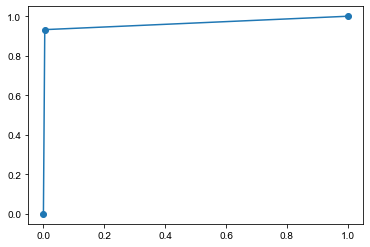

AUC=0.9639


In [62]:
# 定义自变量，提取相关性系数大于±0.05的变量
threshold = 0.05
tmp = pdd_clean.corr()[['flag']].sort_values('flag', ascending=False)
var = tmp.where(np.abs(tmp)>threshold).dropna(how='any').index.values
var = var[1:]

x = pdd_clean[var]
y = pdd_clean['flag']

# NearMiss算法
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=2) #选取正例样本中与N个最远邻负样本平均距离最短的样本
x_nm1, y_nm1 = nm1.fit_sample(x, y)

# 分割数据集
x_train, x_test, y_train, y_test = train_test_split(x_nm1, y_nm1, test_size = 0.3, random_state = 100)

# 训练模型
LR = LogisticRegression(class_weight='balanced')
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['flag=0', 'flag=1']))

# ROC/AUC评估
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr, marker='o')
plt.show()
print("AUC=%.4f"%metrics.auc(fpr, tpr))

In [63]:
LR.intercept_

array([5.85573412])

In [64]:
LR.coef_

array([[ 0.31976942,  0.29253901,  0.42454386,  0.01130798, -0.31527926,
        -0.36870659, -0.13843719, -1.25450761, -0.53122046]])

## 业务解读 

- 经过几次优化将auc提升至0.96。

In [67]:
#exp(系数)计算 p/1-p为exp(系数)
import math
print(math.exp(0.32))
print(math.exp(0.29))
print(math.exp(0.42))
print(math.exp(0.01))
print(math.exp(-0.32))
print(math.exp(-0.37))
print(math.exp(-1.34))
print(math.exp(-1.25))
print(math.exp(-0.53))

1.3771277643359572
1.336427488025472
1.5219615556186337
1.010050167084168
0.7261490370736909
0.6907343306373547
0.261845668580326
0.2865047968601901
0.5886049696783552


In [66]:
print(var)

['coupon_used_in_last_month' 'job_retired' 'job_student' 'marital_single'
 'marital_married' 'loan_yes' 'job_blue-collar'
 'coupon_used_in_last6_month' 'returned_yes']


模型解读：
- 近1个月内使用优惠券用户 使用优惠券概率 是近1个月内未使用优惠券用户 1.38倍
- 退休用户 使用优惠券概率 是非退休用户的 1.34倍
- 学生用户 使用优惠券概率 是非学生用户的 1.52倍
- 单身用户 使用优惠券概率 是非单身用户的 1.01倍
- 已婚用户 使用优惠券概率 是未婚用户的 0.73倍
- 有过贷款用户 使用优惠券概率 是无贷款用户的 0.69倍
- 蓝领用户 使用优惠券概率 是非蓝领用户的 0.26倍
- 近6个月内使用优惠券用户 使用优惠券概率 是近6个月内未使用优惠券用户 0.29倍
- 有过退货用户 使用优惠券概率 是未退货用户的 0.59倍

业务建议：
- 向近1个月内使用过优惠券的用户，退休用户，学生用户，单身用户，已婚用户发放优惠券/向他们购物车/收藏区相同种类产品发放优惠券。并且app推送优惠券消息，吸引这个群体。
- 向近6个月内未使用过优惠券的用户发放优惠券 且 有详细的优惠券使用方法，因为他们可能此时（1）他们可能没有使用优惠券的习惯/不知如何使用（2）确实有一些购物需求（3）手上有些可以购物的闲钱。
- 同样投入情况下，学生用户，近1个月内使用优惠券用户，退休用户是回报率前三。